# Compute color and texture measures on the whole image

In [2]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
configtf = tf.ConfigProto()
configtf.gpu_options.allow_growth = True
configtf.gpu_options.visible_device_list = "0"
set_session(tf.Session(config=configtf))
%matplotlib inline
from keras.datasets import mnist
import matplotlib.pyplot as plt
import rcv

/home/mara/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

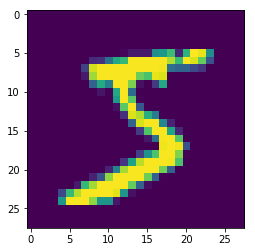

In [4]:
plt.imshow(x_train[0])

In [5]:
rcv.get_texture_measure(x_train[0], mtype='ASM')

/home/mara/.local/lib/python2.7/site-packages/skimage/feature/texture.py:109: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(image.dtype, np.float):


array([[0.56878219]])

In [5]:
rcv.get_all_texture_measures(x_train[0])

{'ASM': array([[0.56878219]]),
 'contrast': array([[1789.86243386]]),
 'correlation': array([[0.86298341]]),
 'dissimilarity': array([[14.71164021]]),
 'energy': array([[0.7541765]]),
 'homogeneity': array([[0.80615506]])}

In [6]:
import numpy as np
color_mnist_image = np.transpose(np.asarray([x_train[0]] *3),[1,2,0])

In [7]:
rcv.get_all_color_measures(color_mnist_image, verbose=False)

{'black': 0.8507653061224489,
 'blue': 0.0,
 'colorfulness': 0.0,
 'cyano': 0.0,
 'green': 0.0,
 'magenta': 0.0,
 'orange': 0.0,
 'purple': 0.0,
 'red': 0.0,
 'white': 0.1096938775510204,
 'yellow': 0.0}

In [1]:
# TO DO: compute measures on a masked area

# Compute the regression
Global Regression under the Euclidean space assumption

In [7]:
import keras
inceptionv3 = keras.applications.inception_v3.InceptionV3(include_top=True, weights=None, input_tensor=None, input_shape=None, pooling=None, classes=10)

In [8]:
reload(rcv)
from rcv import *

In [9]:
get_batch_activations(inceptionv3, 'mixed10', np.expand_dims(color_mnist_image, axis=0))

ResourceExhaustedError: OOM when allocating tensor with shape[96]
	 [[Node: batch_normalization_17/moving_mean/biased/Assign = Assign[T=DT_FLOAT, _class=["loc:@batch_normalization_17/moving_mean"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](batch_normalization_17/moving_mean/biased, batch_normalization_17/AssignMovingAvg/batch_normalization_17/moving_mean/zeros)]]

Caused by op u'batch_normalization_17/moving_mean/biased/Assign', defined at:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/mara/.local/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mara/.local/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mara/.local/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/mara/.local/lib/python2.7/site-packages/tornado/ioloop.py", line 1064, in start
    handler_func(fd_obj, events)
  File "/home/mara/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mara/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/mara/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/mara/.local/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/mara/.local/lib/python2.7/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/mara/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/mara/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/mara/.local/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/mara/.local/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/mara/.local/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/mara/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2714, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/mara/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2818, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/mara/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2878, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-717aff1615da>", line 2, in <module>
    inceptionv3 = keras.applications.inception_v3.InceptionV3(include_top=True, weights=None, input_tensor=None, input_shape=None, pooling=None, classes=10)
  File "/usr/local/lib/python2.7/dist-packages/keras/applications/inception_v3.py", line 208, in InceptionV3
    branch3x3dbl = conv2d_bn(branch3x3dbl, 96, 3, 3)
  File "/usr/local/lib/python2.7/dist-packages/keras/applications/inception_v3.py", line 82, in conv2d_bn
    x = BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
  File "/usr/local/lib/python2.7/dist-packages/keras/engine/topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/keras/layers/normalization.py", line 193, in call
    self.momentum),
  File "/usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py", line 1004, in moving_average_update
    x, value, momentum, zero_debias=True)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/training/moving_averages.py", line 85, in assign_moving_average
    update_delta = _zero_debias(variable, value, decay)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/training/moving_averages.py", line 208, in _zero_debias
    trainable=False)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 1203, in get_variable
    constraint=constraint)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 1092, in get_variable
    constraint=constraint)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 425, in get_variable
    constraint=constraint)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 394, in _true_getter
    use_resource=use_resource, constraint=constraint)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/ops/variable_scope.py", line 805, in _get_single_variable
    constraint=constraint)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 213, in __init__
    constraint=constraint)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/ops/variables.py", line 346, in _init_from_args
    validate_shape=validate_shape).op
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/ops/state_ops.py", line 276, in assign
    validate_shape=validate_shape)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/ops/gen_state_ops.py", line 57, in assign
    use_locking=use_locking, name=name)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/mara/.local/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[96]
	 [[Node: batch_normalization_17/moving_mean/biased/Assign = Assign[T=DT_FLOAT, _class=["loc:@batch_normalization_17/moving_mean"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](batch_normalization_17/moving_mean/biased, batch_normalization_17/AssignMovingAvg/batch_normalization_17/moving_mean/zeros)]]


In [ ]:
get_activations(inceptionv3, 'mixed10', x_train)

# RCV improvements
Local Regression under the Euclidean space assumption